[![Colab Badge](https://img.shields.io/badge/Open_in_Colab-blue?style=for-the-badge)][colab-link]
<a href="javascript:void(0);" onclick="openJupyterWidget('https://github.com/nmfs-opensci/EDMW-EarthData-Workshop-2025/blob/main/tutorials/clean/Tutorial_1_access.ipynb');">
    <img src="https://img.shields.io/badge/Open_in_JupyterHub-orange?style=for-the-badge" alt="JupyterHub Badge">
</a> [![Download Badge](https://img.shields.io/badge/Download-grey?style=for-the-badge)][download-link] [![JupyterHub](https://img.shields.io/badge/Workshop_Hub-green?style=for-the-badge)][jupyter-link]

[download-link]: https://github.com/nmfs-opensci/EDMW-EarthData-Workshop-2025/blob/main/tutorials/clean/Tutorial_1_access.ipynb
[colab-link]: https://colab.research.google.com/github/nmfs-opensci/EDMW-EarthData-Workshop-2025/blob/main/tutorials/clean/Tutorial_1_access.ipynb
[jupyter-link]: https://workshop.nmfs-openscapes.2i2c.cloud/hub/user-redirect/lab?fromURL=https://raw.githubusercontent.com/nmfs-opensci/EDMW-EarthData-Workshop-2025/main/tutorials/clean/Tutorial_1_access.ipynb

>📘 Learning Objectives
>
> 1. How to authenticate with `earthaccess`
> 2. How to use `earthaccess` to search for data using spatial and temporal filters
> 3. How to explore and work with search results
> 4. How to plot a single file


## Summary

In this example we will use the `earthaccess` library to search for data collections from NASA Earthdata. `earthaccess` is a Python library that simplifies data discovery and access to NASA Earth science data by providing an abstraction layer for NASA’s [Common Metadata Repository (CMR) API](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html) Search API. The library makes searching for data more approachable by using a simpler notation instead of low level HTTP queries. `earthaccess` takes the trouble out of Earthdata Login **authentication**, makes **search** easier, and provides a stream-line way to download or stream search results into an `xarray` object.

For more on `earthaccess` visit the [`earthaccess` GitHub](https://github.com/nsidc/earthaccess) page and/or the [`earthaccess` documentation](https://earthaccess.readthedocs.io/en/latest/) site. Be aware that `earthaccess` is under active development. 

## Prerequisites

An Earthdata Login account is required to access data from NASA Earthdata. Please visit <https://urs.earthdata.nasa.gov> to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.  


## Get Started

### Import Required Packages  

In [1]:
import earthaccess 
import xarray as xr

In [ ]:
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

### Search for data  

We want to search NASA Earthdata for collections using the OCI instrument. Use
<https://search.earthdata.nasa.gov/search?fi=OCI>

There are multiple keywords we can use to discovery data from collections. The table below contains the `short_name`, `concept_id`, and `doi` for some collections we are interested in for other exercises. Each of these can be 
used to search for data or information related to the collection we are interested in.  

| Description | Shortname | Collection Concept ID | 
| --- | --- | --- |
| Level 2 Apparent Optical Properties | [PACE_OCI_L2_AOP](https://cmr.earthdata.nasa.gov/search/concepts/C3385049983-OB_CLOUD.html) | C3385049983-OB_CLOUD | 
| Level 3 RRS | [PACE_OCI_L3M_RRS](https://cmr.earthdata.nasa.gov/search/concepts/C3385050676-OB_CLOUD.html) | C3385050676-OB_CLOUD |


How can we find the `shortname` or `concept_id` for collections not in the table above?. Let's take a quick detour.

<https://search.earthdata.nasa.gov/search>

### Search by collection - Level 2 data


In [3]:
# Level 2 data
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L2_AOP',
    temporal = ("2025-03-05", "2025-03-05")
)
len(results)

143

Why are there so many?? Level 2 data is swath data and swath data is in spatial chunks. We need to specify a bounding box.

In [4]:
# Level 2 data
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L2_AOP',
    temporal = ("2025-03-05", "2025-03-05"),
    bounding_box = (-98.0, 27.0, -96.0, 31.0)
)
len(results)

1

### Search by collection - Level 3 data

Level 3 is global data (no swaths and no tiles) so there should be one file per day, right?

In [4]:
# Level 3 data
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_RRS',
    temporal = ("2025-03-05", "2025-03-05")
)
len(results)

6

Why so many? There are month, 8-day, day and 2 resolutions. You need to look at the filenames and filter to get the files you want.

In [9]:
# all the file names
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250226_20250305.L3m.8D.RRS.V3_0.Rrs.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250226_20250305.L3m.8D.RRS.V3_0.Rrs.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250301_20250331.L3m.MO.RRS.V3_0.Rrs.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250301_20250331.L3m.MO.RRS.V3_0.Rrs.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250305.L3m.DAY.RRS.V3_0.Rrs.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250305.L3m.DAY.RRS.V3_0.Rrs.4km.nc']]

In [5]:
# Level 3 data
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_RRS',
    temporal = ("2025-03-05", "2025-03-05"),
    granule_name="*.MO.*.0p1deg.*"
)
len(results)

1

### Refining the search

Here are the common arguments for `earthaccess.search_data()`:

* `bounding_box` is a lat/lon box, e.g. `(xmin=-73.5, ymin=33.5, xmax=-43.5, ymax=43.5)`
* `temporal` is a date range, e.g. `("2020-01-16", "2020-12-16")`
* `cloud_cover` is a range `(0, 10)`
* `granule_name` is a matching filter, e.g. `"*.DAY.*.0p1deg.*"`
* `short_name` or `collection_id`

### Working with `earthaccess` returns  

Following the search for data, you'll likely take one of two pathways with those results. You may choose to **download** the assets that have been returned to you or you may choose to continue working with the search results within the Python environment.  

In [12]:
type(results[0])

earthaccess.results.DataGranule

In [4]:
results[0]

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L3M_RRS'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-03-05T00:00:00Z', 'EndingDateTime': '2025-03-05T23:59:59Z'}}
Size(MB): 141.34002208709717
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250305.L3m.DAY.RRS.V3_0.Rrs.0p1deg.nc']

#### Download `earthaccess` results

In some cases you may want to download your assets. `earthaccess` makes downloading the data from the search results very easy using the `earthaccess.download()` function. 

`earthaccess` does a lot of heavy lifting for us. It identifies the downloadable links, passes our Earthdata Login credentials, and saves the files with the proper names.

#### Work in the cloud

Alternatively we can work with the metadata without downloading and only load the data into memory (or download) when we need to compute with it or plot it. We use `earthaccess`'s `open()` method to create a 'fileset' to the cloud objects and then open that with `xarray`.

In [10]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/6 [00:00<?, ?it/s]

In [11]:
ds = xr.open_dataset(fileset[0], chunks={})
ds

<xarray.Dataset> Size: 4GB
Dimensions:     (wavelength: 172, lat: 1800, lon: 3600, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 1kB 346.0 348.0 351.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 7kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon         (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float32 4GB dask.array<chunksize=(16, 1024, 8), meta=np.ndarray>
    palette     (rgb, eightbitcolor) uint8 768B dask.array<chunksize=(3, 256), meta=np.ndarray>
Attributes: (12/64)
    product_name:                      PACE_OCI.20250226_20250305.L3m.8D.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/3.0
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         2431585
    data_minimum:                      -0.010000002
    data_maximum:                      0.10000001

In [12]:
ds_size_gb = ds.nbytes / 1e9
print(f"Dataset size: {ds_size_gb:.2f} GB")

Dataset size: 4.46 GB


We can plot this object.

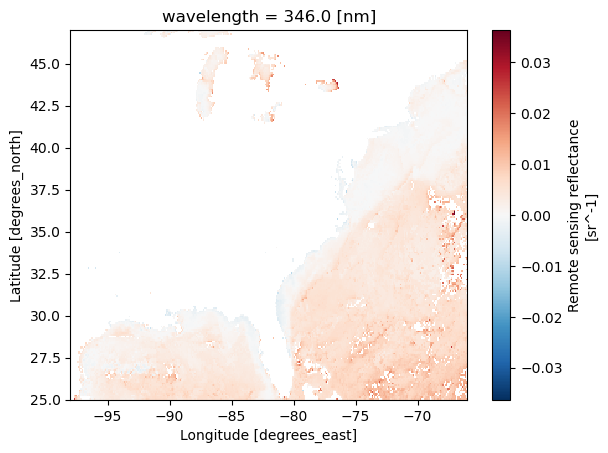

In [13]:
rrs = ds['Rrs'].sel(wavelength=346, lat=slice(47, 25), lon=slice(-98, -66))
rrs.plot();

### Chunks

The data are cloud-optimized (read optimized) so that we don't have to read the whole file into memory to work with it and we don't have to download the whole thing if we don't need to.

In [26]:
ds.chunks

Frozen({'lat': (16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 8), 'lon': (1024, 1024, 1024, 528), 'wavelength': (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4), 'rgb': (3,), 'eightbitcolor': (256,)})

Chunking let's us work with big datasets without blowing up our memory. This task takes awhile but it doesn't blow up our little 2Gb RAM virtual machines. `xarray` and `dask` are smart and work through the task chunk by chunk.

In [19]:
%%time
# Pick a variable and a wavelength value
varname = list(ds.data_vars)[0]
# select the first wavelength
one_wl = ds[varname].isel(wavelength=0)
# under the hood, dask + xarray is computing the mean chunk by chunk
val = one_wl.mean(dim=("lat", "lon")).compute()

If we tried to load the data into memory, we would crash our kernel (max out the RAM).

In [ ]:
%%time
# THIS WILL CRASH THE KERNEL
# this tries to load the whole dataset all at once into memory
unchunked_slice = one_wl.load()
# this would be fast if the load step didn't crash the memory 
val = unchunked_slice.mean(dim=("lat", "lon"))

## Summary

This concludes tutorial 1. You have worked with some PACE data in the cloud and plotted a single file. 
